# Year 2023 Day 21

In [97]:
import numpy as np
import xarray as xr
import hvplot.xarray  # pyright: ignore[reportUnusedImport,reportMissingTypeStubs]
from pathlib import Path
from advent_of_code.common.common import get_puzzle_input_file_path, numpy_2d_to_xarray_row_col
from advent_of_code.y_2023.problem_202321 import (
    parse_text_input,
)
from advent_of_code.y_2023.problem_202321 import (
    get_starting_position,
    run_steps_details,
    create_diamond_int_array,
    create_diamond_mask_array,
    get_free_cells_xda,
    evaluate_quadratic_equation,
    compute_points_for_interpolation,
)

In [98]:
STATIC_RENDERING = True
# Unfortunately the dynamic rendering of hvplot does not work on GitHub Pages.
# The following falls back on rendering static images
if STATIC_RENDERING:
    hvplot.extension("matplotlib")

## With Mock Input

In [99]:
full_size = True 
side = 131 if full_size else 11
middle = 65 if full_size else 5 

arr = np.zeros((side, side), dtype=np.bool_)
assert side // 2 == middle
starting_pos  = middle
arr[middle][middle] # starting pos

False

In [100]:
diamond_array = create_diamond_int_array(numpy_2d_to_xarray_row_col(arr))
diamond_array

<xarray.DataArray (row: 131, col: 131)>
array([[130, 129, 128, ..., 128, 129, 130],
       [129, 128, 127, ..., 127, 128, 129],
       [128, 127, 126, ..., 126, 127, 128],
       ...,
       [128, 127, 126, ..., 126, 127, 128],
       [129, 128, 127, ..., 127, 128, 129],
       [130, 129, 128, ..., 128, 129, 130]])
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130

In [101]:
diamond_array[middle]

<xarray.DataArray (col: 131)>
array([65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])
Coordinates:
    row      int64 65
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130

:Image   [col,row]   (value)
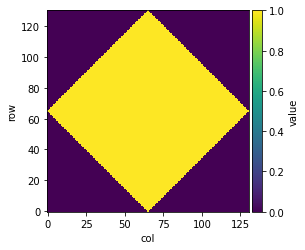

In [102]:
diamond_mask = create_diamond_mask_array(diamond_array)
diamond_mask.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

In [103]:
top_left = diamond_mask[:middle, :middle]
top_left

<xarray.DataArray (row: 65, col: 65)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]], dtype=uint8)
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64
  * col      (col) int64 0 1 2 3 4 5 6 7 8 9 ... 55 56 57 58 59 60 61 62 63 64

In [104]:
top_left = diamond_mask[:middle+2, :middle+2]
top_left

<xarray.DataArray (row: 67, col: 67)>
array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]], dtype=uint8)
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 9 ... 57 58 59 60 61 62 63 64 65 66
  * col      (col) int64 0 1 2 3 4 5 6 7 8 9 ... 57 58 59 60 61 62 63 64 65 66

## With Actual Input

In [105]:
text = (get_puzzle_input_file_path(2023, 21)).read_text()
garden = parse_text_input(text)
garden.coords

Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130

In [106]:
free = get_free_cells_xda(garden)

:Image   [col,row]   (value)
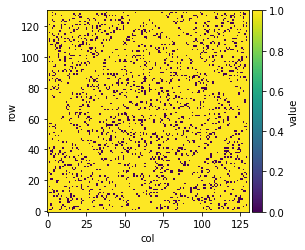

In [107]:
free.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

:Image   [col,row]   (value)
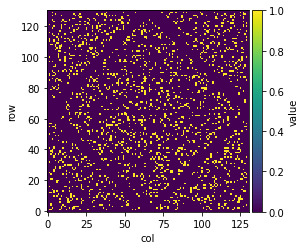

In [108]:
(~free).hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

:Image   [col,row]   (value)
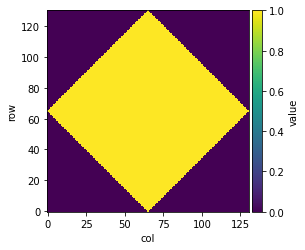

In [109]:
create_diamond_mask_array(free).hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

### Observation on Data

- All edges are free
- The middle row and middle cols are free
- Presence of a diagonal path

Hence the image can be safely divided into 8 half-quadrants

In [110]:
free.coords

Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 123 124 125 126 127 128 129 130

In [111]:
assert free.shape == (side, side)
assert (free[0]).all().item()
assert (free[-1]).all().item()
assert (free[:, 0]).all().item()
assert (free[:, -1]).all().item()
assert free[middle].all().item()
assert free[:, middle].all().item()

In [112]:
initial_pos = get_starting_position(garden)
max_iter = 65 * 2

history, reached, reached_even_xda, reached_odd_xda = run_steps_details(garden, initial_pos, max_iter)

:Image   [col,row]   (value)
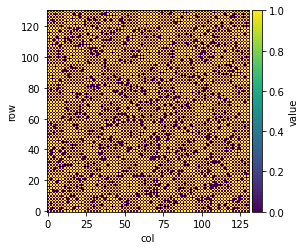

In [113]:
reached_odd_xda.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

:Image   [col,row]   (value)
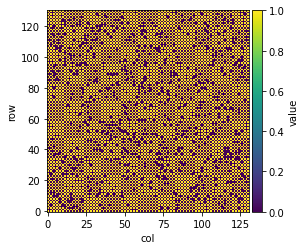

In [114]:
reached_even_xda.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

### Check part 1 can be found again

In [115]:
max_iter = 64 # we will want the even
_, _, reached_even_xda_p1, reached_odd_xda_p1 = run_steps_details(
    garden, initial_pos, max_iter
)

:Image   [col,row]   (value)
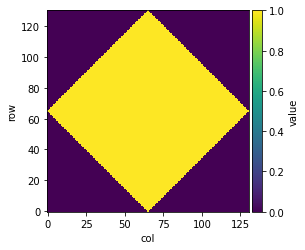

In [116]:
diamond_1x1 = create_diamond_mask_array(reached_even_xda_p1)
diamond_1x1.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

In [117]:
assert reached_even_xda_p1.where(diamond_1x1, 0).sum() == 3740

### 1x1

In [118]:
odd = reached_odd_xda
eve = reached_even_xda

In [119]:
odd.where(create_diamond_mask_array(odd), 0).sum().item()

3859

In [120]:
assert eve.where(create_diamond_mask_array(eve), 0).sum().item() == 3740 
# Part 1 also works when using the eve diagram (as 65 = 64 + 1, we juste iterated one more time)

In [121]:
concat_1 = odd
diamond_1x1 = create_diamond_mask_array(concat_1)

### 3x3 concat

Note: The step count is **EVEN**, so the even array must be placed back at the center of the mosaic.
This cellular automata kind of "flips" every turn.


In [122]:
assert middle + 1 * odd.row.size == 196  # 65 + 1 * 131

In [123]:
new_coords3 = list(range(3 * odd.row.size))
concat_3 = xr.concat(
    [
        xr.concat([eve, odd, eve], dim="col"),
        xr.concat([odd, eve, odd], dim="col"),
        xr.concat([eve, odd, eve], dim="col"),
    ],
    dim="row",
).assign_coords(dict(row=new_coords3, col=new_coords3))
concat_3

<xarray.DataArray (row: 393, col: 393)>
array([[ True, False,  True, ...,  True, False,  True],
       [False, False, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       ...,
       [ True, False,  True, ..., False, False,  True],
       [False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True]])
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 385 386 387 388 389 390 391 392
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 385 386 387 388 389 390 391 392

:Image   [col,row]   (value)
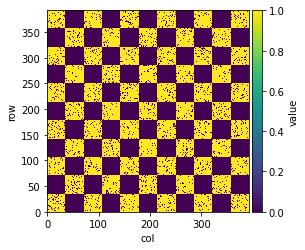

In [124]:
concat_3.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

:Image   [col,row]   (value)
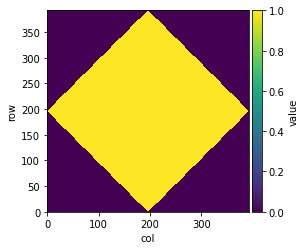

In [125]:
diamond_3x3 = create_diamond_mask_array(concat_3)
diamond_3x3.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

In [126]:
concat_3.where(diamond_3x3, 0).sum().item()

34324

In [127]:
concat_3

<xarray.DataArray (row: 393, col: 393)>
array([[ True, False,  True, ...,  True, False,  True],
       [False, False, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       ...,
       [ True, False,  True, ..., False, False,  True],
       [False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True]])
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 385 386 387 388 389 390 391 392
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 385 386 387 388 389 390 391 392

### 5x5 concat

Note: The step count is odd, so odd must be placed back at the center of the mosaic

In [128]:
assert middle + 2 * odd.row.size == 327 # 65 + 2 * 131

In [129]:
new_coords5 = list(range(5 * odd.row.size))
concat_5 = xr.concat(
    [
        xr.concat([odd, eve, odd, eve, odd], dim="col"),
        xr.concat([eve, odd, eve, odd, eve], dim="col"),
        xr.concat([odd, eve, odd, eve, odd], dim="col"),
        xr.concat([eve, odd, eve, odd, eve], dim="col"),
        xr.concat([odd, eve, odd, eve, odd], dim="col"),
    ],
    dim="row",
).assign_coords(dict(row=new_coords5, col=new_coords5))
concat_5

<xarray.DataArray (row: 655, col: 655)>
array([[False,  True, False, ..., False,  True, False],
       [ True, False, False, ...,  True, False,  True],
       [False,  True, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       [False,  True, False, ..., False,  True, False]])
Coordinates:
  * row      (row) int64 0 1 2 3 4 5 6 7 8 ... 647 648 649 650 651 652 653 654
  * col      (col) int64 0 1 2 3 4 5 6 7 8 ... 647 648 649 650 651 652 653 654

:Image   [col,row]   (value)
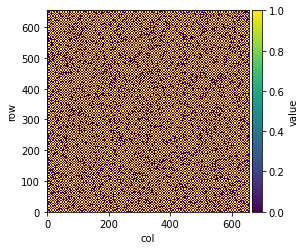

In [130]:
concat_5.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

:Image   [col,row]   (value)
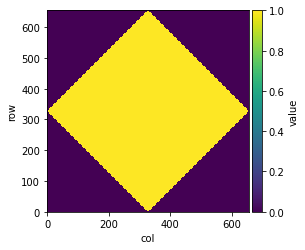

In [131]:
diamond_5x5 = create_diamond_mask_array(concat_5)
diamond_5x5.hvplot.image(y="row", x="col", data_aspect=1, cmap="viridis")

In [132]:
concat_5.where(diamond_5x5, 0).sum().item()

95135

### Interpolation

In [133]:
x, y = compute_points_for_interpolation(
    concat_1, diamond_1x1, concat_3, diamond_3x3, concat_5, diamond_5x5
)

In [134]:
assert evaluate_quadratic_equation(x, y, 0) == y[0]
assert evaluate_quadratic_equation(x, y, 1) == y[1]
assert evaluate_quadratic_equation(x, y, 2) == y[2]

In [135]:
result = evaluate_quadratic_equation(x, y, 26501365 // 131)

In [136]:
# If result is too high:
# The error was because I forgot to put the even array at the center of the 3x3 mosaic
# Each macro step changes the parity